<div align="center">
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ<br>
ІНСТИТУТ ПРИКЛАДНОГО СИСТЕМНОГО АНАЛІЗУ<br>
НАЦІОНАЛЬНОГО ТЕХНІЧНОГО УНІВЕРСИТЕТУ УКРАЇНИ<br>
«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ»<br>
КАФЕДРА МАТЕМАТИЧНИХ МЕТОДІВ СИСТЕМНОГО АНАЛІЗУ<br>
</div>
<br><br><br><br><br><br><br><br>
<center><font size="+2">Лабораторна робота №4</font></center>
<center>З курсу "Чисельні методи"</center>
<center>Тема "Розв’язання рівнянь з частинними похідними"</center>
<br><br><br><br>
<div align="right">
    <strong>Виконав:</strong><br>
    Студент группи КА-81<br>
    Єрко А.В.<br><br>
    <strong>Прийняла:</strong><br>
    Хоменко О.В.
</div>
<br><br><br><br><br><br><br>
<center>Київ - 2020</center>


<hr>

### Мета роботи:
набути вміння та досвід використання методів
рівнянь з частинними похідними.
# Завдання 1:
Використовуючи метод сіток (скінченних різниць) розв’язати
задачу Діріхле для рівняння Лапласа $\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$
в квадраті АВСD з вершинами
$А(0;0), B(0;1), C(1;1), D(1;0)$ при $h=0.2$. При розв’язуванні задачі використати
ітераційний процес усереднення Лібмана, для чого скласти відповідну програму.

Задачу розв’язати з точністю а) $\varepsilon = 0.01$, б) $\varepsilon = 0.001$.

### Звіт має містити:
1. Номер варіанту.
2. Дискретизацію області зміни аргументу.
3. Перехід від неперервної диференціальної математичної моделі до скінченно-різницевої моделі (можна не друкувати, а робити фото написаного і вставляти в звіт).
4. Побудову початкового наближення (нульового шаблону).
5. Текст програми.
6. Послідовність отриманих шаблонів для випадку а). Для випадку б) вивести останній шаблон ітераційного процесу, вказавши його номер.
7. Відповідь.

### **Варіант 4**
$$
\left.u\right|_{AB} = 20y; \quad
\left.u\right|_{BC} = 20; \quad
\left.u\right|_{CD} = 20y^2; \quad
\left.u\right|_{AD} = 50x(1-x); \quad
$$

In [1]:
### Умови задачі
# Граничні умови
u_AB = lambda y: 20 * y
u_BC = lambda x: 20 + 0*x #*0 як найпростіший шлях векторизувати const ф-цію
u_CD = lambda y: 20 * y**2
u_AD = lambda x: 50 * x * (1 - x)
# Крок
h = 0.2

## 1.1  Дискретизація
Дискретизуємо область визначення сіткою з кроком $h=0.2$ як по $x$ так і по $y$

In [2]:
m = int(1/h)+1 #кількість вузлів вздовж вісі

import numpy as np
x = np.linspace(0, 1, num=m)
y = np.linspace(0, 1, num=m)
gx, gy = np.meshgrid(x,x)

Візуалізуємо:

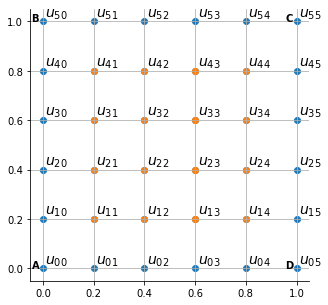

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(gx,gy)
plt.scatter(gx[1:-1,1:-1],gy[1:-1,1:-1])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
for i,j in np.ndindex(m,m):
    plt.text(x[i]+0.01,y[j]+0.02,r'$u_{%d%d}$'%(j,i), fontsize=14)
plt.text(x[0]-0.045,y[0],'A',weight='bold')
plt.text(x[0]-0.045,y[-1],'B',weight='bold')
plt.text(x[-1]-0.045,y[-1],'C',weight='bold')
plt.text(x[-1]-0.045,y[0],'D',weight='bold');

## 1.2 Перехід до скінченно-різницевої моделі 

Різницеве рівняння, що відповідає рівнянню Лапласа:
$$
\frac{u_{m-1,n} - 2u_{m,n} + u_{m+1,n}}{h^2}
+
\frac{u_{m,n} - 2u_{m,n-1} + u_{m,n+1}}{h^2}
=0
$$
або
$$
u_{m-1,n} +u_{m+1,n} - 4u_{m,n}+ u_{m,n-1} + u_{m,n+1} = 0
$$
$\Rightarrow$
$$ u_{m,n}=\frac{1}{4}\left(u_{m-1,n} + u_{m,n-1} + u_{m+1,n} + u_{m,n+1}\right)$$

## 1.3 Побудова нульового шаблону
Значення в граничних вузлах однозначно визначаються крайовими умовами

In [4]:
u = np.empty((m,m))
u[:,0] = u_AB(y)
u[-1] = u_BC(x)
u[:,-1] = u_CD(y)
u[0] = u_AD(x)

Початкове наближення оберемо з припущення, що значення функції по горизонталях розподілені рівномірно

In [5]:
def unif(a):
    '''
    a - 1d array
    '''
    d = (a[-1]-a[0])/(len(a)-1)
    for i,_ in enumerate(a):
        a[i] = a[0] + i*d
    return a

for i in range(1,len(u)-1):
    u[i] = unif(u[i])

Отже наш нульовий шаблон має вигляд:

In [6]:
import pandas as pd
pd.options.display.float_format = '{:,g}'.format

u = pd.DataFrame(u, 
                 columns=pd.Series(x,name='x'),
                 index=pd.Series(y,name='y')
                 )
display(u)

x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,3.36,2.72,2.08,1.44,0.8
0.4,8,7.04,6.08,5.12,4.16,3.2
0.6,12,11.04,10.08,9.12,8.16,7.2
0.8,16,15.36,14.72,14.08,13.44,12.8
1,20,20,20,20,20,20


## 1.4 Ітераційний процесс
Реалізуємо ітераційний процес усереднення Лібмана, а саме метод Якобі.
Ітераційна формула має вигляд:
$$u_{i,j}^{(k+1)} = \frac{1}{4}\left(u_{i-1,j}^{(k)} + u_{i,j-1}^{(k)} + u_{i+1,j}^{(k)} + u_{i,j+1}^{(k)}\right), \quad i,j = \overline{1,m-2}$$
Ітерація продовжується до тих пір, поки максимальна різниця елементів $k$-того та $(k+1)$-го шаблонів не перевищуватиме заданий рівень точності $\varepsilon$.

In [7]:
def jacobi_iteration(u, eps, print_out=False):
    '''
    u - pd.DataFrame, початкове наближення
    eps - float, рівень точності
    '''
    u = u.copy()
    iteration_number = 0;
    residual = np.inf
    while residual > eps:
        iteration_number += 1
        u_k = u.to_numpy()       
        u_k1 = (u_k[0:-2, 1:-1] # будуємо наступний шаблон шляхом
                + u_k[2:, 1:-1] # "зсуву" попереднього в кожному напрямку
                + u_k[1:-1, 0:-2]
                + u_k[1:-1, 2:]
                )/4
        # нев'язка - максимальна з модулів різниць u_k та u_k1
        residual = (np.abs(u_k[1:-1, 1:-1] - u_k1)).max(axis=(0,1))
        u.iloc[1:-1, 1:-1] = u_k1
        if print_out:
            print("Iteration %d:" % iteration_number)
            display(u)
    return u, iteration_number

## 1.5 Послідовність отриманих шаблонів
### 1.5 а) $\varepsilon = 0.01$

In [8]:
jacobi_iteration(u, eps=0.01, print_out=True);

Iteration 1:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,5.44,5.88,5.32,3.76,0.8
0.4,8,7.12,6.24,5.36,4.48,3.2
0.6,12,11.12,10.24,9.36,8.48,7.2
0.8,16,15.44,14.88,14.32,13.76,12.8
1,20,20,20,20,20,20


Iteration 2:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,6.25,7.25,6.75,4.65,0.8
0.4,8,7.7,7.15,6.35,5.2,3.2
0.6,12,11.2,10.4,9.6,8.7,7.2
0.8,16,15.5,15,14.5,13.9,12.8
1,20,20,20,20,20,20


Iteration 3:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,6.7375,8.0375,7.5625,5.1875,0.8
0.4,8,8.15,7.925,7.175,5.725,3.2
0.6,12,11.4,10.7375,9.9875,8.975,7.2
0.8,16,15.55,15.1,14.625,14,12.8
1,20,20,20,20,20,20


Iteration 4:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.04688,8.55625,8.1,5.52187,0.8
0.4,8,8.51562,8.525,7.8,6.13438,3.2
0.6,12,11.6094,11.1031,10.3781,9.22813,7.2
0.8,16,15.625,15.2281,14.7719,14.1,12.8
1,20,20,20,20,20,20


Iteration 5:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.26797,8.91797,8.46953,5.75859,0.8
0.4,8,8.79531,8.99375,8.28437,6.4375,3.2
0.6,12,11.8109,11.4352,10.7258,9.45312,7.2
0.8,16,15.7094,15.375,14.9266,14.2,12.8
1,20,20,20,20,20,20


Iteration 6:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.42832,9.18281,8.74023,5.92676,0.8
0.4,8,9.01816,9.3582,8.65664,6.67402,3.2
0.6,12,11.985,11.7264,11.0248,9.64082,7.2
0.8,16,15.7965,15.5178,15.0752,14.2949,12.8
1,20,20,20,20,20,20


Iteration 7:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.55024,9.38169,8.94155,6.05356,0.8
0.4,8,9.19287,9.646,8.94932,6.85605,3.2
0.6,12,12.1353,11.9714,11.2748,9.79844,7.2
0.8,16,15.8757,15.6495,15.2094,14.379,12.8
1,20,20,20,20,20,20


Iteration 8:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.64364,9.53445,9.09614,6.1494,0.8
0.4,8,9.33287,9.87383,9.17959,7.00033,3.2
0.6,12,12.26,12.1764,11.4821,9.92745,7.2
0.8,16,15.9462,15.7641,15.3258,14.452,12.8
1,20,20,20,20,20,20


Iteration 9:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.71683,9.6534,9.21586,6.22412,0.8
0.4,8,9.44437,10.0558,9.36311,7.11411,3.2
0.6,12,12.3639,12.345,11.6523,10.0336,7.2
0.8,16,16.006,15.8621,15.4246,14.5133,12.8
1,20,20,20,20,20,20


Iteration 10:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.77444,9.74713,9.31016,6.28249,0.8
0.4,8,9.53413,10.2015,9.50953,7.20521,3.2
0.6,12,12.4489,12.4835,11.7916,10.1199,7.2
0.8,16,16.0565,15.9439,15.5069,14.5645,12.8
1,20,20,20,20,20,20


Iteration 11:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.82031,9.82152,9.38479,6.32884,0.8
0.4,8,9.60619,10.3186,9.6271,7.27799,3.2
0.6,12,12.5185,12.5965,11.905,10.1903,7.2
0.8,16,16.0982,16.0117,15.575,14.6067,12.8
1,20,20,20,20,20,20


Iteration 12:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.85693,9.88092,9.44437,6.36569,0.8
0.4,8,9.66436,10.4128,9.72158,7.33657,3.2
0.6,12,12.5752,12.6885,11.9972,10.2474,7.2
0.8,16,16.1326,16.0674,15.6309,14.6413,12.8
1,20,20,20,20,20,20


Iteration 13:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.88632,9.92853,9.49205,6.39523,0.8
0.4,8,9.71124,10.4888,9.79774,7.38367,3.2
0.6,12,12.6213,12.7632,12.0721,10.2938,7.2
0.8,16,16.1607,16.113,15.6765,14.6696,12.8
1,20,20,20,20,20,20


Iteration 14:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.90994,9.9668,9.53038,6.41893,0.8
0.4,8,9.74912,10.5502,9.85916,7.42169,3.2
0.6,12,12.6588,12.8238,12.1328,10.3313,7.2
0.8,16,16.1836,16.1501,15.7137,14.6926,12.8
1,20,20,20,20,20,20


Iteration 15:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.92898,9.99762,9.56122,6.43802,0.8
0.4,8,9.77972,10.5997,9.90876,7.45235,3.2
0.6,12,12.6891,12.873,12.182,10.3618,7.2
0.8,16,16.2022,16.1803,15.7439,14.7112,12.8
1,20,20,20,20,20,20


Iteration 16:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.94434,10.0225,9.5861,6.45339,0.8
0.4,8,9.80446,10.6398,9.94882,7.47713,3.2
0.6,12,12.7137,12.9128,12.2218,10.3864,7.2
0.8,16,16.2173,16.2048,15.7684,14.7264,12.8
1,20,20,20,20,20,20


Iteration 17:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.95673,10.0425,9.60617,6.46581,0.8
0.4,8,9.82445,10.6721,9.98121,7.49715,3.2
0.6,12,12.7336,12.945,12.2541,10.4063,7.2
0.8,16,16.2296,16.2246,15.7882,14.7387,12.8
1,20,20,20,20,20,20


Iteration 18:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.96675,10.0588,9.62239,6.47583,0.8
0.4,8,9.84063,10.6983,10.0074,7.51334,3.2
0.6,12,12.7498,12.9711,12.2802,10.4225,7.2
0.8,16,16.2396,16.2407,15.8044,14.7486,12.8
1,20,20,20,20,20,20


Iteration 19:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.97485,10.0719,9.6355,6.48393,0.8
0.4,8,9.85371,10.7195,10.0286,7.52643,3.2
0.6,12,12.7628,12.9923,12.3013,10.4355,7.2
0.8,16,16.2476,16.2538,15.8174,14.7567,12.8
1,20,20,20,20,20,20


Iteration 20:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.98139,10.0825,9.64609,6.49048,0.8
0.4,8,9.86429,10.7366,10.0457,7.53701,3.2
0.6,12,12.7734,13.0094,12.3184,10.4461,7.2
0.8,16,16.2541,16.2643,15.828,14.7632,12.8
1,20,20,20,20,20,20


Iteration 21:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.98669,10.091,9.65465,6.49577,0.8
0.4,8,9.87285,10.7504,10.0595,7.54557,3.2
0.6,12,12.7819,13.0232,12.3323,10.4547,7.2
0.8,16,16.2594,16.2729,15.8365,14.7685,12.8
1,20,20,20,20,20,20


Iteration 22:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.99097,10.0979,9.66158,6.50006,0.8
0.4,8,9.87977,10.7616,10.0707,7.55249,3.2
0.6,12,12.7889,13.0344,12.3435,10.4616,7.2
0.8,16,16.2637,16.2798,15.8434,14.7728,12.8
1,20,20,20,20,20,20


Iteration 23:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,7.99443,10.1035,9.66718,6.50352,0.8
0.4,8,9.88537,10.7707,10.0798,7.5581,3.2
0.6,12,12.7945,13.0434,12.3525,10.4672,7.2
0.8,16,16.2672,16.2854,15.849,14.7763,12.8
1,20,20,20,20,20,20


### 1.5 б) $\varepsilon = 0.001$

In [9]:
u_2, iteration = jacobi_iteration(u, eps=0.001)
print("Iteration %d:" % iteration)
display(u_2)

Iteration 34:


x,0,0.2,0.4,0.6,0.8,1
y,,,,,,
0,0,8,12,12,8,0
0.2,4,8.00767,10.125,9.6886,6.51676,0.8
0.4,8,9.90679,10.8054,10.1145,7.57951,3.2
0.6,12,12.8159,13.0781,12.3872,10.4886,7.2
0.8,16,16.2804,16.3068,15.8704,14.7895,12.8
1,20,20,20,20,20,20


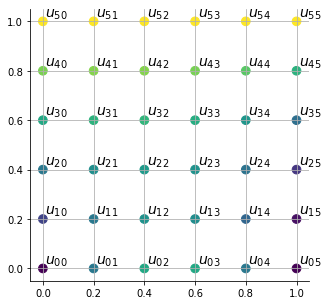

In [10]:
plt.figure(figsize=(5, 5))
plt.scatter(gx,gy,s=75,c=u_2)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
for i,j in np.ndindex(m,m):
    plt.text(x[i]+0.01,y[j]+0.02,r'$u_{%d%d}$'%(j,i), fontsize=14)

### * Трохи дослідження збіжності методу Якобі

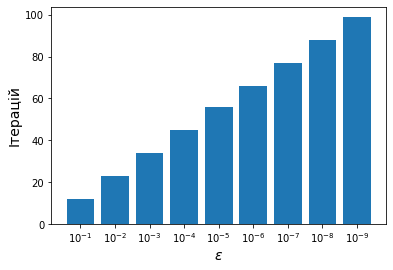

In [11]:
num = 10
eps = [r'$10^{-%d}$'%i for i in range(1,num)]
iters = [jacobi_iteration(u, 10**(-i))[1] for i in range(1,num)]

plt.bar(eps, iters);
plt.xlabel(r'$\varepsilon$', fontsize=14)
plt.ylabel('Ітерацій',fontsize=14);

## Висновки
Задачу Діріхлє на одиничному квадраті для рівняння Лапласа було розв'язано методом сіток з використанням ітераційного процессу усереднення Лібмана. Для збіжності з рівнями точності $\varepsilon = 0.01$ та $\varepsilon = 0.001$ знадобилось 23 та 34 ітерації відповідно у випадку з "рівномірним" початковим наближенням. Також було встановлено, що при 10-ти кратному збільшенні рівня точності складність методу Якобі зростає лінійно.

У отриманного наближення функції спостерігаються мінімуми в точках $A$ та $D$, по мірі віддалення від них значення функції зростають, досягаючи свого максимума на грані $BC$.

---

# Завдання 2
Використовуючи метод сіток (скінченних різниць) розв’язати мішану
задачу параболічного типу $\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$
(рівняння теплопровідності) при заданих
початкових умовах (див. таблицю для кожного варіанту) $u(x,0)=f(x)$, $u(0,t)=\varphi(t)$,
$u(0.6, t)=\psi(t)$, де $х \in [0; 0.6]$. Розв'язання виконати для $h=0.1$, для $t \in [0; 0.01]$, $\sigma=1/6$.

### Звіт має містити
1. Номер варіанту.
2. Дискретизацію області зміни аргументу.
3. Перехід від неперервної диференціальної математичної моделі до скінченно-різницевої моделі (можна не друкувати, а робити фото написаного і вставляти в звіт).
4. Текст програми.
5. Результати у вигляді таблиці.
6. Зробити висновок.

### Варіант 4
$$
u(x, 0) = \sin 2x; \qquad
u(0, t) = 2t; \qquad
u(0.6, t) = 0.932;
$$

In [12]:
u_x_0 = lambda x: np.sin(2*x)
u_0_t = lambda t: 2*t
u_06_t = lambda t: 0.932 + 0*t

h = 0.1
sigma = 1/6

## 2.1 Дискретизація
Дискретизуємо область визначення сіткою з кроком $h=0.1$ по $x$.

Крок по $t$ знаходиться з рівняння $\sigma = \frac{\tau}{h^2} \Rightarrow \tau = \frac{0.01}{6} = 0.00167$

Таким чином, $m=m_x=m_t=7$ 

In [13]:
m = int(np.round(0.6/h))+1 #кількість вузлів
x = np.linspace(0, 0.6, num=m)

t = np.linspace(0, 0.01, num=m)
gx, gt = np.meshgrid(x,t)

Візуалізуємо:

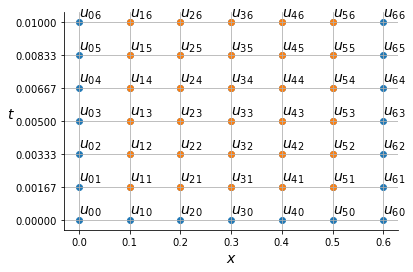

In [14]:
plt.scatter(gx,gt)
plt.scatter(gx[1:,1:-1],gt[1:,1:-1])
plt.xticks(x)
plt.yticks(t)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.ylabel('$t$',rotation=0, fontsize=14)
plt.xlabel('$x$', fontsize=14);
for i,j in np.ndindex(m,m):
    plt.text(x[i],t[j]+0.0003,r'$u_{%d%d}$'%(i,j), fontsize=14)

## 2.2 Перехід до скінченно-різницевої моделі

Значення в граничних вузлах визначаються без похибки з відповідних крайових та початкової умов

Явна схема, що апроксимує одновимірне рівняння теплопровідності має вигляд
$$u_{i,j+1} = \sigma u_{i+1,j} + (1-2\sigma)u_{i,j} + \sigma u_{i-1,j} \quad i = \overline{1,m-2};\, j=\overline{1,m-1}$$

## 2.3 Розв'язок

In [15]:
u = np.zeros((m,m))
# початкові та крайові умови
u[0] = u_x_0(x)
u[:,0] = u_0_t(t)
u[:,-1] = u_06_t(t)

# апроксимація
for i in range(1,m):
    uk = u[i-1]
    u[i,1:-1] = (1-2*sigma)*uk[1:-1] + sigma*(uk[:-2]+uk[2:])

## 2.4 Результати

In [16]:
u = pd.DataFrame(u, 
                 columns=pd.Series(x,name='x'),
                 index=pd.Series(t,name='t')
                 )
display(u)

x,0,0.1,0.2,0.3,0.4,0.5,0.6
t,,,,,,,
0,0,0.198669,0.389418,0.564642,0.717356,0.841471,0.932
0.00166667,0.00333333,0.197349,0.386831,0.560891,0.71259,0.835873,0.932
0.00333333,0.00666667,0.196594,0.384261,0.557164,0.707854,0.831347,0.932
0.005,0.01,0.196217,0.3818,0.553462,0.703321,0.82754,0.932
0.00666667,0.0133333,0.196111,0.37948,0.549828,0.699048,0.824247,0.932
0.00833333,0.0166667,0.19621,0.37731,0.546307,0.695044,0.821339,0.932
0.01,0.02,0.196469,0.375292,0.54293,0.691304,0.818734,0.932


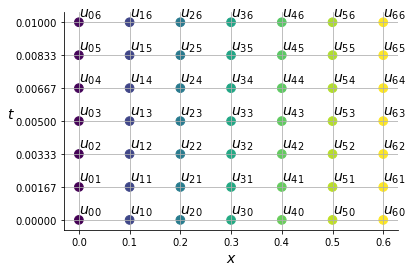

In [17]:
plt.scatter(gx,gt,s=75,c=u)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(x)
plt.yticks(t)
plt.grid()
plt.ylabel('$t$',rotation=0, fontsize=14)
plt.xlabel('$x$', fontsize=14);
for i,j in np.ndindex(m,m):
    plt.text(x[i],t[j]+0.0003,r'$u_{%d%d}$'%(i,j), fontsize=14)

## Висновки
Одновимірну мішану задачу параболічного типу було розв'язано з використанням методу сіток. Отриманий наближений розв'язок змінюється слабо при зміні $t$ в межах $[0,0.01]$ і зростає при збільшенні $x$.

Слід зазначити, що цей метод потребує набагато менше обчислень ніж ітераційні методи, проте його точність для сіток з відносно великим кроком, як і в нашому завданні, є доволі низькою у більшості випадків.